In [16]:
# Это пример выгрузки, а также обработки некоторых строковых данных и изменение типа

import pandas as pd
import matplotlib.pyplot as plt
import re
import ast

def get_num(x):
    f = re.findall(r'[0-9.,]+', x)
    return float(f[0].replace(',', ''))

def get_weight(x):
    if 'ounces' in x.lower():
        return get_num(x) * 28.3495
    if 'pounds' in x.lower():
        return get_num(x) * 453.592
    if x[-1:].lower() == 'g' or x[-5:].lower() == 'grams':
        return get_num(x)
    if 'kilograms' in x.lower():
        return get_num(x) * 1000
    return x

def get_memory(x):
    if 'gb' in x.lower():
        return get_num(x)
    if 'mb' in x.lower():
        return get_num(x) / 1024
    if 'tb' in x.lower():
        return get_num(x) * 1024
    return get_num(x)

def get_dim(x):
    if 'inches' in x.lower():
        f = re.findall(r'[0-9.,]+ x [0-9.,]+ x [0-9.,]+', x)
        return [float(y) for y in f[0].split('x')]
    return x

def get_resolution_horizontal(x):
    if 'Inches' in x:
        return None
    if '×' in x:
        x = x.replace('×', 'x')
    if 'X' in x:
        x = x.replace('X', 'x')
    f = re.findall(r'[0-9]+ x [0-9]+', x)
    if len(f) == 0:
        f = re.findall(r'[0-9]+x[0-9]+', x)
    if len(f) == 0:
        return get_num(x)
    return max([float(y) for y in f[0].split('x')])

def get_resolution_vertical(x):
    if 'Inches' in x:
        return None
    if '×' in x:
        x = x.replace('×', 'x')
    if 'X' in x:
        x = x.replace('X', 'x')
    f = re.findall(r'[0-9]+ x [0-9]+', x)
    if len(f) == 0:
        f = re.findall(r'[0-9]+x[0-9]+', x)
    if len(f) == 0:
        return None
    return min([float(y) for y in f[0].split('x')])

df = pd.read_csv('../csv_files/items_new.csv')


# in grams
df['weight'] = df['phone_weight'].apply(lambda x: None if type(x) != str else get_weight(x))

#in GB
df['mem_storage_cap'] = df['phone_mem_storage_cap'].apply(lambda x: None if type(x) != str else get_memory(x))
df['ram_memory_installed_size'] = df['phone_ram_memory_installed_size'].apply(lambda x: None if type(x) != str else get_memory(x))
df['ram'] = df['phone_ram'].apply(lambda x: None if type(x) != str else get_memory(x))

# in mm (not inches)
df['height'] = df['phone_dim'].apply(lambda x: None if type(x) != str else max(get_dim(x)) * 25.4)
df['width'] = df['phone_dim'].apply(lambda x: None if type(x) != str else (sum(get_dim(x)) - max(get_dim(x))  - min(get_dim(x)))  * 25.4)
df['depth'] = df['phone_dim'].apply(lambda x: None if type(x) != str else min(get_dim(x)) * 25.4)

# in mm (not inches)
df['standing_screen_display_size'] = df['phone_standing_screen_display_size'].apply(lambda x: None if type(x) != str else get_num(x))

# in pixels
df['resolution_horizontal'] = df['phone_scanner_res'].apply(lambda x: None if type(x) != str else get_resolution_horizontal(x))
df['resolution_vertical'] = df['phone_scanner_res'].apply(lambda x: None if type(x) != str else get_resolution_vertical(x))

# Converting string dictionary to dictionary
df['cust_say'] = df['phone_cust_say'].apply(lambda x: ast.literal_eval(x))

df = df.drop(columns=['phone_weight', 'phone_mem_storage_cap', 'phone_ram_memory_installed_size', 
                      'phone_ram', 'phone_dim', 'phone_standing_screen_display_size', 'phone_cust_say', 'phone_scanner_res'])

df.head()

,phone_full_name,phone_review_rating,phone_rate_number,phone_list_price,phone_discount,phone_brand,phone_ASIN,phone_model_numer,phone_batteries,phone_os,...,mem_storage_cap,ram_memory_installed_size,ram,height,width,depth,standing_screen_display_size,resolution_horizontal,resolution_vertical,cust_say
0,Samsung Galaxy A55 5G A556E 256GB Dual-SIM GSM...,4.2,269 ratings,NaN,0%,SAMSUNG,B0CYHZ11CM,SAMSUNG A55,1 Lithium Polymer batteries required. (included),Android 14 with Samsung One UI 6.1,...,8.0,8.0,8.0,161.036,77.470,8.128,6.60,2340.0,1080.0,"{'Phone quality': {'pos_rev': '10', 'neg_rev':..."
1,Tracfone | Samsung Galaxy A25 5G | Locked | 12...,4.2,40 ratings,NaN,0%,Tracfone,B0CTVZCXCM,S256VL,1 Lithium Polymer batteries required. (included),Android 13.0,...,6.0,6.0,NaN,162.052,77.470,8.128,6.50,1920.0,1080.0,"{'Screen quality': {'pos_rev': '6', 'neg_rev':..."
2,"SAMSUNG Galaxy A16 5G Dual SIM (256GB, 8GB) 6....",3.0,1 rating,NaN,0%,SAMSUNG,B0DMTTFB2B,A166M/DS,1 Lithium Ion batteries required. (included),Android 14,...,256.0,8.0,NaN,152.400,101.600,50.800,6.70,2340.0,1080.0,{}
3,SAMSUNG Galaxy A14 4G LTE (128GB + 4GB) Unlock...,4.3,743 ratings,NaN,0%,SAMSUNG,B0BXVKVR98,SM-A145M/DS,1 Lithium Ion batteries required. (included),"Android 12, One UI Core 4.1",...,128.0,4.0,4.0,166.878,77.978,8.890,6.60,2408.0,1080.0,"{'Phone quality': {'pos_rev': '37', 'neg_rev':..."
4,Tracfone | Motorola Moto g Power 5G 2024 | Loc...,4.4,21 ratings,NaN,0%,Tracfone,B0DFHQ72M3,XT2415V,1 Lithium Polymer batteries required. (included),Android 14,...,8.0,8.0,NaN,NaN,NaN,NaN,6.72,1920.0,1080.0,"{'Value for money': {'pos_rev': '6', 'neg_rev'..."


In [17]:
data= df['cust_say'].values
prices = df['price'].values

result = []

for d, p in zip(data, prices):
    for tag, values in d.items():
        # Создаем словарь с нужными колонками
        row = {
            'pos_rev': values['pos_rev'],
            'neg_rev': values['neg_rev'],
            'tone': values['tone'],
            'tags': tag,
            'price': p,
        }
        # Добавляем строку в результирующий список
        result.append(row)

# Создаем DataFrame из списка словарей
df1 = pd.DataFrame(result)

# Выводим результат
print(df1)


     pos_rev neg_rev      tone                tags  price
0         10       0  POSITIVE       Phone quality  375.9
1         10       0  POSITIVE     Value for money  375.9
2         10       0  POSITIVE       Build quality  375.9
3         10       0  POSITIVE               Speed  375.9
4         10       0  POSITIVE       Color quality  375.9
...      ...     ...       ...                 ...    ...
2700      34       5  NEGATIVE        Battery life   54.0
2701      34       5  NEGATIVE   Freeze resistance   54.0
2702      34       5  NEGATIVE  Wifi functionality   54.0
2703       4       0  POSITIVE        Case quality   27.5
2704       4       0  NEGATIVE       Functionality   27.5

[2705 rows x 5 columns]


In [38]:
dff = df1.tags.value_counts()
dff = dff[df1.tags.value_counts() > 10]
dff.index.values

array(['Value for money', 'Functionality', 'Phone quality',
       'Battery life', 'Speed', 'Durability', 'Fit', 'Ease of use',
       'Quality', 'Camera quality', 'Build quality', 'Color',
       'Phone protection', 'Design', 'Feel', 'Screen quality',
       'Picture quality', 'Grip', 'Ease of setup', 'Size',
       'Compatibility', 'Connectivity', 'Sound quality', 'Comfort',
       'Looks', 'Charging speed', 'Storage capacity', 'Display quality',
       'Phone case', 'Phone functionality', 'Case quality',
       'Slipperiness', 'Charging capability', 'Look',
       'Phone unlockability', 'Slackness', 'Phone condition',
       'Unlockability'], dtype=object)

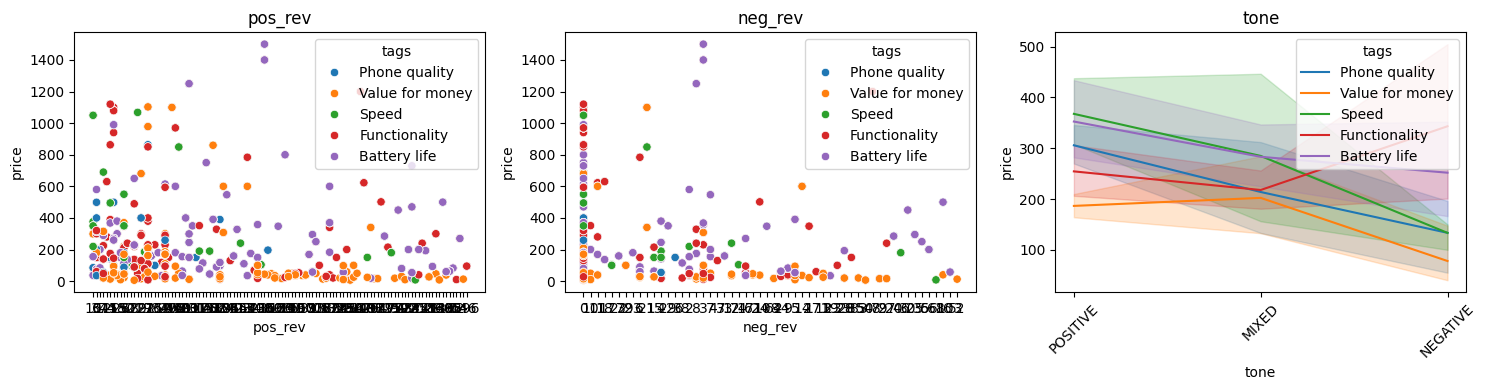

In [42]:
import seaborn as sns

df2 = df1[df1.tags.isin(['Value for money', 'Functionality', 'Phone quality', 'Battery life', 'Speed'])]
# sns.scatterplot(data=df2, x='pos_rev', y='price', hue='tags')
# plt.xticks(rotation=45)
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

sns.scatterplot(ax = ax[0], data=df2, x='pos_rev', y='price', hue='tags')
ax[0].set_title('pos_rev')

sns.scatterplot(ax = ax[1], data=df2, x='neg_rev', y='price', hue='tags')
ax[1].set_title('neg_rev')

sns.lineplot(ax = ax[2], data=df2, x='tone', y='price', hue='tags')
ax[2].set_title('tone')


plt.xticks(rotation=45)

# Настраиваем макет
plt.tight_layout()
plt.show()

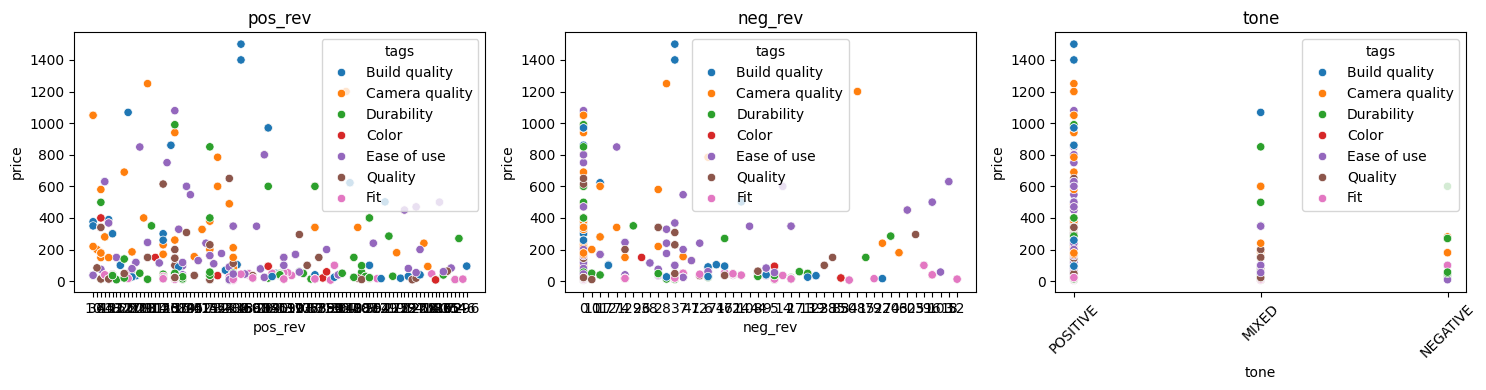

In [40]:
import seaborn as sns

df2 = df1[df1.tags.isin(['Durability', 'Fit', 'Ease of use',
       'Quality', 'Camera quality', 'Build quality', 'Color'])]
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

sns.scatterplot(ax = ax[0], data=df2, x='pos_rev', y='price', hue='tags')
ax[0].set_title('pos_rev')

sns.scatterplot(ax = ax[1], data=df2, x='neg_rev', y='price', hue='tags')
ax[1].set_title('neg_rev')

sns.scatterplot(ax = ax[2], data=df2, x='tone', y='price', hue='tags')
ax[2].set_title('tone')


plt.xticks(rotation=45)

# Настраиваем макет
plt.tight_layout()
plt.show()

Пример графиков =)

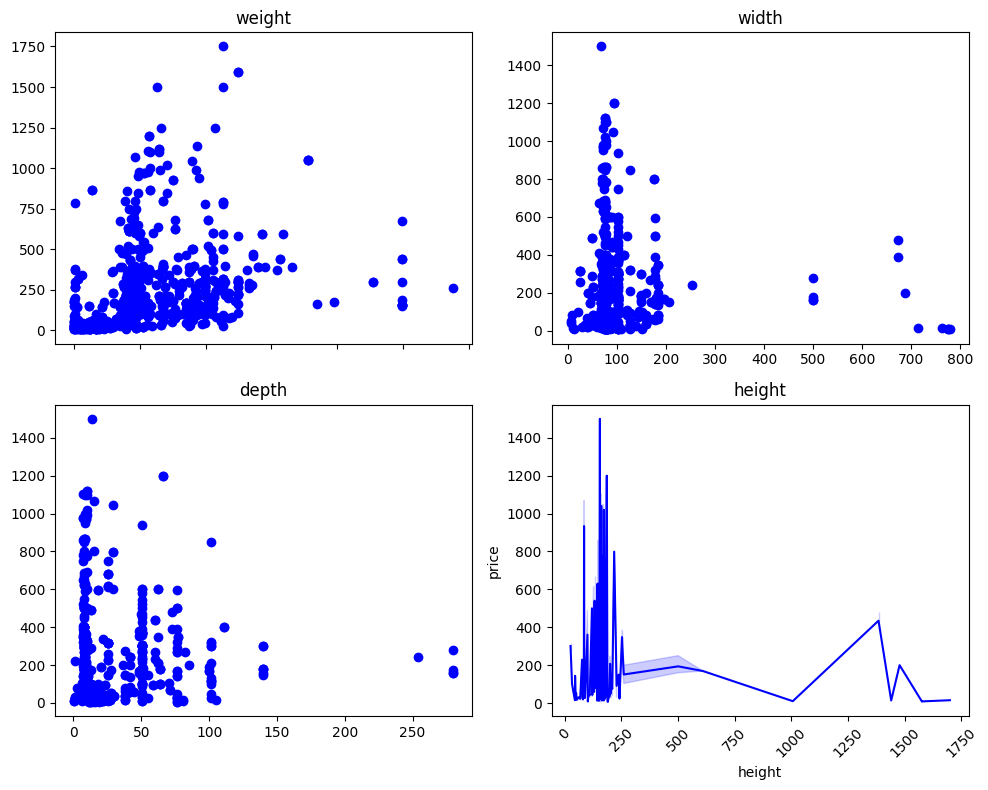

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Создаем 2x2 подграфика
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# Рисуем разные функции

sns.lineplot(ax=ax[1, 1], x=df['height'], y=df['price'], c='b')
ax[1, 1].set_title('height')

ax[0, 1].scatter(df['width'], df['price'], c='b')
ax[0, 1].set_title('width')

ax[1, 0].scatter(df['depth'], df['price'], c='b')
ax[1, 0].set_title('depth')

ax[0, 0].scatter(df['weight'], df['price'], c='b')
ax[0, 0].set_title('weight')
ax[0, 0].tick_params(labelbottom=False) 

plt.xticks(rotation=45)

# Настраиваем макет
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Создаем 2x2 подграфика
fig, ax = plt.subplots(3, 3, figsize=(13, 10))

# Рисуем разные функции
ax[1, 1].scatter(df['height'], df['price'], c='b')
ax[1, 1].set_title('height')

ax[0, 1].scatter(df['width'], df['price'], c='b')
ax[0, 1].set_title('width')

ax[1, 0].scatter(df['depth'], df['price'], c='b')
ax[1, 0].set_title('depth')

ax[0, 0].scatter(df['weight'], df['price'], c='b')
ax[0, 0].set_title('weight')
# ax[0, 0].tick_params(labelbottom=False) 

ax[2, 0].scatter(df['mem_storage_cap'], df['price'], c='b')
ax[2, 0].set_title('mem_storage_cap')
ax[2, 1].scatter(df['ram_memory_installed_size'], df['price'], c='b')
ax[2, 1].set_title('ram_memory_installed_size')
ax[2, 2].scatter(df['ram'], df['price'], c='b')
ax[2, 2].set_title('ram')

ax[0, 2].scatter(df['resolution_horizontal'], df['price'], c='b')
ax[0, 2].set_title('resolution_horizontal')
ax[1, 2].scatter(df['resolution_vertical'], df['price'], c='b')
ax[1, 2].set_title('resolution_vertical')

plt.xticks(rotation=45)

# Настраиваем макет
plt.tight_layout()
plt.show()


In [1]:
# Это пример выгрузки, а также обработки некоторых строковых данных и изменение типа

import pandas as pd

df = pd.read_csv('../mvideo_features.csv')
df.head()

,product_id,name,brand,Гарантия,Гарантия предоставляется,Страна,Год релиза,Серия,Состояние,Внешний вид,...,Разрешение дополнительного экрана по вертикали (Пикс),Разрешение дополнительного экрана по горизонтали (Пикс),Складной смартфон,Встроенный искусственный интеллект,Проводная гарнитура,Micro-SIM,Гарантия на аксессуары (мес.),Гарантия на АКБ (мес.),Дополнительная комплектация,Сканер радужной оболочки глаза
0,30063534,Смартфон Apple iPhone 13 128GB nanoSim/eSim Mi...,Apple,1 год,продавцом,Китай,2021.0,iPhone 13,новый,новый,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,400410049,Смартфон HONOR X9c 12/256GB Titanium Black,HONOR,2 года,производителем,Китай,2025.0,X9c,новый,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,400307033,Смартфон HUAWEI Pura 70 Pro 12/512GB White,HUAWEI,1 год,производителем,Китай,2024.0,Pura 70 Pro,новый,новый,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30074449,Смартфон Apple iPhone 16 Pro 256GB Desert Tita...,Apple,1 год,продавцом,Китай,2024.0,iPhone 16 Pro,новый,новый,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,400257859,Смартфон POCO M6 Pro 12/512 Gb Black,POCO,1 год,производителем,Китай,2023.0,M6 Pro,новый,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
sm = df.dtypes[df.dtypes == 'float64']
sm

Год релиза                                                 float64
Частота обновления (Гц)                                    float64
Яркость (кд/кв.м)                                          float64
Количество ядер                                            float64
Встроенная память (ROM) (ГБ)                               float64
Цифровой зум (x)                                           float64
Количество фронтальных камер (шт)                          float64
Разрешение основной камеры (МПикс)                         float64
Мощность блока питания (Вт)                                float64
Время в режиме ожидания (ч)                                float64
Время в режиме разговора (ч)                               float64
Емкость аккумулятора (мАч)                                 float64
Вес (г)                                                    float64
Оптический зум на увеличение (x)                           float64
Максимальная емкость карты памяти (ГБ)                     flo

In [23]:
sm = df.dtypes[df.dtypes == 'int64']
sm

product_id                        int64
Количество основных камер (шт)    int64
basePrice                         int64
salePrice                         int64
dtype: object

In [27]:
df[['Встроенный барометр']].count()

Встроенный барометр    304
dtype: int64

In [ ]:
sns.scatterplot()

In [73]:
df[['Сканер радужной оболочки глаза','Цвет']]

,Сканер радужной оболочки глаза,Цвет
0,NaN,темная ночь
1,NaN,черный
2,NaN,белый
3,NaN,титановый/ золотистый
4,NaN,черный
...,...,...
995,NaN,титановый/ синий
996,NaN,титановый/ золотистый
997,NaN,титановый
998,NaN,титановый/ черный


In [75]:
df['Дополнительная комплектация'].value_counts()

Дополнительная комплектация
Защитная пленка    3
Name: count, dtype: int64

In [70]:
df['Цвет производителя'].value_counts()

Цвет производителя
Black               24
Blue                23
White Titanium      15
Starlight           15
Midnight            14
Pink                14
Black Titanium      13
Desert Titanium     12
Natural Titanium    11
Green               10
Gold                10
Purple               8
Silver               7
White                5
Space Black          3
Deep Purple          3
Red                  2
Blue Titanium        2
Sierra Blue          2
Teal                 2
Ultramarine          2
Alpine Green         1
(PRODUCT)RED         1
титан                1
черный               1
натуральный          1
Name: count, dtype: int64

<Axes: xlabel='Цвет', ylabel='salePrice'>

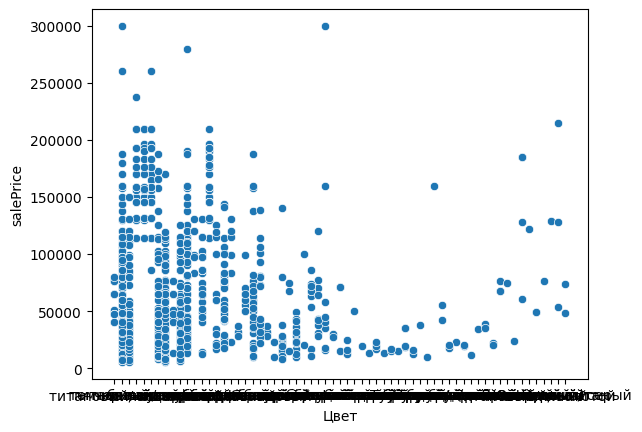

In [38]:
import seaborn as sns
sns.scatterplot(data=df, x='Цвет', y='salePrice')

<Axes: xlabel='None', ylabel='Count'>

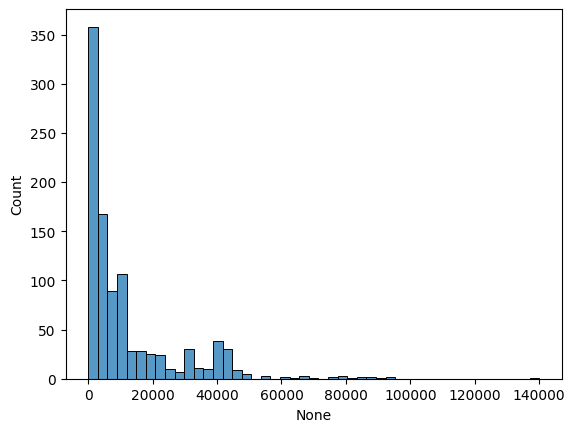

In [36]:
sns.histplot(x=df['basePrice'] - df['salePrice'])